In [23]:
import networkx as nx
import random 
import matplotlib.pyplot as plt

#We have done - saving nodes , saving edges, 
#NEED TO DO - 

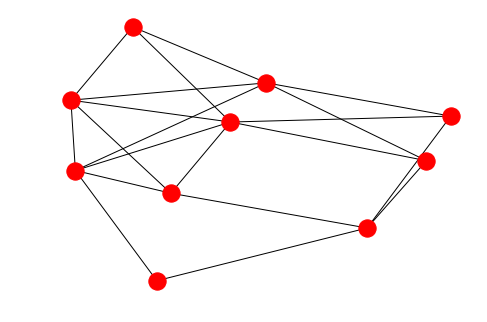

In [24]:
#Generate random graph - harcoded - ** NEED TO COMPARE OVER ENSEMBLE OF WS AND ER graphs
ER = nx.gnp_random_graph(10,0.5)
WS = nx.watts_strogatz_graph(10,2,0.5)

nx.draw(ER)


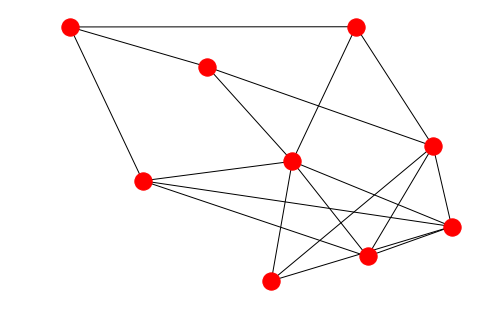

In [25]:
#Built-in k-core algorithm
ER_3core = nx.algorithms.core.k_core(ER, k=3)

nx.draw(ER_3core)

In [26]:
# *Testing #Clustering coeff of ER and WS graphs 


#Clustering coeff of all nodes
nx.clustering(ER)
nx.clustering(WS)


#Avg clustering coeff of 
nx.average_clustering(ER)
nx.average_clustering(WS)


0.2333333333333333

In [27]:
#Import empirical data 


#Read in Caltech dataset
file = open("socfb-Caltech36_copy.txt", "r")  # saves the file
lines = file.read().splitlines()    # Reads in the file line by line, saves each line as an element in a list

type(lines)
#First two lines are descriptors so we delete them
lines.remove(lines[0])
lines.remove(lines[0])
# lines
# test = lines[1].split(' ')
# print(test[1])
# print(type(test[1]))
# test[1] = int(test[1])
# print(type(test[1]))


sources = []
targets = []
for i in range(0, len(lines)):
    temp = lines[i].split(' ')
    sources.append(int(temp[0]))
    targets.append(int(temp[1]))

    
# Make the network
Caltech = nx.Graph()
E = len(sources)    # Number of edges
for i in range(E):
    Caltech.add_edge(sources[i], targets[i])




In [28]:
#Degree distribution function for ER and WS graphs
# @Param: n is num of nodes in graph, p is probability , num_graphs is num of graphs in sample, graph_type is str "ER" or "WS", k = k nearest ngbrs each node is connected to for WS only, otherwise default k=0
# @Return: list_pk dict with keys representing degrees, values representing proportion of graph with that degree

def degree_dist(n, p, num_graphs, k=0, graph_type = "ER"):


    graphs = []
    degrees = []
    edges = []
    deg_dist = []

    for i in range(0, num_graphs):
        if(graph_type == "WS"):
            G = nx.watts_strogatz_graph(n,k,p)
        else:
            G = nx.gnp_random_graph(n, p)
        graphs.append(G) 
        degrees.append(list(G.degree))
        edges.append(len(list(G.edges())))



#Traverse through all the elements of degrees, and create a dictionary showing frequency of the different numbers of degrees


    list_pGk = []
    for i in range(0, len(degrees)): #for each graph
        G_freq = {}                    #Dict with frequency of the degrees of each graph in set 
        pGk = {}                     #Dict
        for j in range(0, n):            #for each node
            item = degrees[i][j][1]        #item = degree number in freq dict
            if (item in G_freq): 
                G_freq[item] += 1
            else: 
                G_freq[item] = 1
    

#     for key, value in G_freq.items(): 
#         print ("% d : % d"%(key, value))
    
    
        for key, value in G_freq.items():
            item = key
            prop = float(value) / n
            pGk[item] = prop
    
        list_pGk.append(pGk)

#         for key, value in pGk.items():
#             print ((key, value))
#         print("End pGK ")


# print(list_pGk)
# print(degrees)
  

#For each graph in list_pgk, for each (degree num, freq) pair, store degree number, if key 

    list_pk = {}
    for i in range(0, len(list_pGk)):
        for key, value in list_pGk[i].items():
            if(key not in list_pk):
                temp = key 
                temp_total = value 
                for j in range (i+1, len(list_pGk)): #for each of the rest of the dicts
                    for key, value in list_pGk[j].items(): #for each (degree,freq) in the rest of the list pgK
                        if(temp == key):
                        #print("hit")
                            temp_total += value 
                        #print("tt", temp_total)

                    

            list_pk[temp] = temp_total / num_graphs 
    return list_pk
        #print("key", temp, "value", temp_total)
        

<BarContainer object of 111 artists>

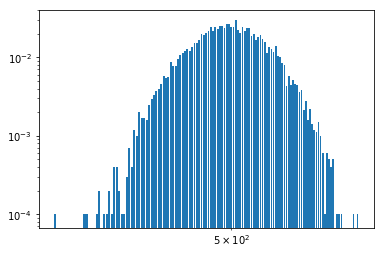

In [29]:
#Mean degree distribution for ER graphs with 1000 nodes and set prob p 

degree_dist_ER = degree_dist(n=1000, p=0.5, num_graphs=10)
#degree_dist_ER

plt.yscale("log")
plt.xscale("log")
plt.bar(degree_dist_ER.keys(), degree_dist_ER.values())


#ER does not follow a power law degree distribution 

<BarContainer object of 45 artists>

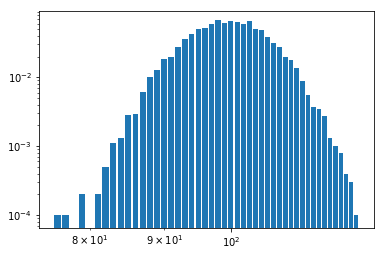

In [30]:
# Mean degree distribution of WS graphs with n=1000 and set prob p 

degree_dist_WS = degree_dist(n=1000, p=0.5, num_graphs = 10, k=100, graph_type = "WS")
plt.yscale("log")
plt.xscale("log")
plt.bar(degree_dist_WS.keys(), degree_dist_WS.values())

# WS does not follow a power-law degree distribution


In [31]:
# Degree distribution of one network 

def degree_dist_one(G):
    graphs = []
    degrees = []
    edges = []
    n = len(Caltech.nodes)

    G = Caltech

    graphs.append(G) 
    degrees.append(list(G.degree))
    edges.append(len(list(G.edges())))

    
    list_pGk = []
    for i in range(0, len(degrees)): #for each graph
        G_freq = {}                    #Dict with frequency of the degrees of each graph in set                    #Dict
        for j in range(0, n):            #for each node
            item = degrees[i][j][1]        #item = degree number in freq dict
            if (item in G_freq): 
                G_freq[item] += 1          #if degree already in freq dict, update frequency of degree
            else: 
                G_freq[item] = 1           #else add degree to freq dict
            



    # Degrees are list_pk.values(), proportion of degrees are list_pk.keys()

    return G_freq
   

    


Text(0,0.5,'frequency of nodes')

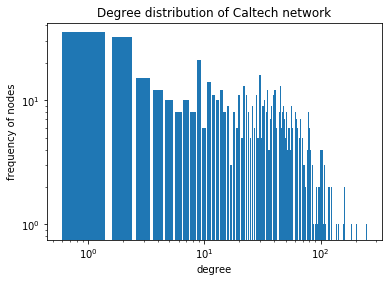

In [32]:
#Degree distribution of Caltech network


Caltech_degree_dist = degree_dist_one(Caltech)
plt.yscale("log")
plt.xscale("log")

plt.bar(Caltech_degree_dist.keys(), Caltech_degree_dist.values())
plt.title('Degree distribution of Caltech network')
plt.xlabel('degree')
plt.ylabel('frequency of nodes')


#Caltech network follows power-law distribution 



<BarContainer object of 137 artists>

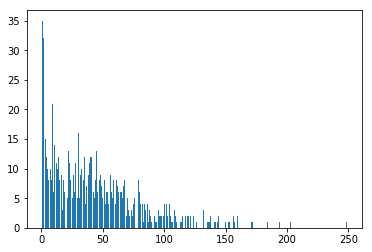

In [33]:
#Degree distribution of 35th core of Caltech network

Caltech_35core = nx.k_core(Caltech, k=35)

Caltech_35core_degree_dist = degree_dist_one(Caltech_35core)

plt.bar(Caltech_35core_degree_dist.keys(), Caltech_35core_degree_dist.values())
